# Partitionnement hiérarchique

## Importation des bibliothèques
* make_blobs permet de générer des distributions suivant une loi normale

In [84]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# 1/ Ici on ne détermine pas le nombre de groupe à l'avance 
# On définie des critères pour de rapprochement

# 2/ Calcule de toutes les distances entre les diff. individu

# 3/ construction d'un arbre qui réuini les individus les plus proches, 
# puis les groupes d'individu les plus proches

## Génération des données :
* Cette fois nous allons générer des données à l'aide de scikit-learn
    * n_samples = nombre de points à générer
    * n_features = nombre de paramètres des points
    * centers = nombre de centres à générer (paramètre de la loi normale)
    * cluster_std = La déviation standard pour les partition (paramètre de la loi normale)

In [85]:
# 200 exemple générer à partir des loi normal avec un centre à 4 
#  cluster_std => un étart standart à la moyen de 1
# n_features => nb d'input / param / colone 

params, obj = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=42)
obj

array([1, 0, 3, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 2, 0, 3, 2, 2, 2, 2,
       3, 0, 3, 0, 0, 2, 0, 1, 2, 2, 3, 3, 0, 1, 3, 1, 3, 0, 2, 0, 2, 2,
       3, 1, 1, 2, 1, 0, 3, 0, 3, 1, 0, 0, 2, 2, 0, 1, 3, 1, 2, 3, 3, 2,
       1, 0, 3, 0, 0, 3, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 3, 3, 3, 3, 0,
       1, 3, 2, 0, 1, 1, 1, 3, 0, 1, 2, 0, 3, 3, 0, 2, 0, 1, 3, 2, 2, 3,
       1, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 2, 1, 3, 3, 1, 0, 1, 1, 0, 2, 2,
       0, 3, 3, 1, 2, 2, 0, 2, 1, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 3, 1, 3,
       2, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 2, 1, 1, 2, 1, 3, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0, 0, 2, 3, 3, 0, 3, 1, 0,
       2, 1])

## Ajout des bibliothèques pour utiliser le partitionnement hiérarchique
* Dans scipy se trouve un objet pour générer graphiquement les arbres de partitionnement
* Dans sklearn, nous cherchons l'algorithme de partitionnement par agglomération

In [86]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

## Arbre de partitionnement avec scipy
* Le diagramme représentant les groupements hiérarchiques s'appelle un dendrogramme
* La fonction linkage de scipy permet de réaliser l'agglomération :
    * method = 'single' : basé sur la distance minimum
    * method = 'complete' : basé sur la distance maximum
    * method = 'average' : basé sur la distance moyenne
    * method = 'centroid' : basé sur la distance entre les centroids (centre de gravité)
    * method = 'ward' : : methode basée sur la minimisation des écarts au carré après la fusion de deux partitions  
* Une fois le partitionnement réalisé, il ne reste plus qu'à afficher le dendogramme


(array([-8.85792259,  5.88791592]), array([4.2164279 , 6.32544035]))

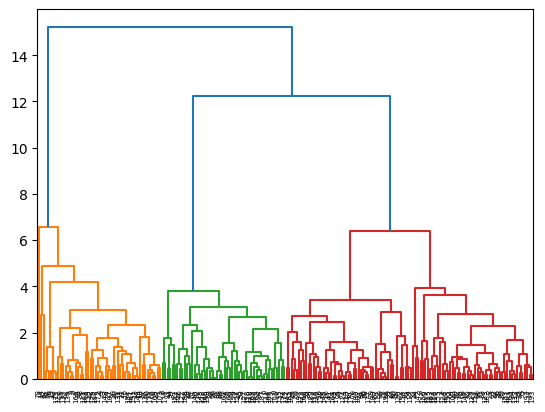

In [87]:
dendrograme = sch.dendrogram(sch.linkage(params, method='average'))
params[2], params[8]

## Représentation graphique des points générés

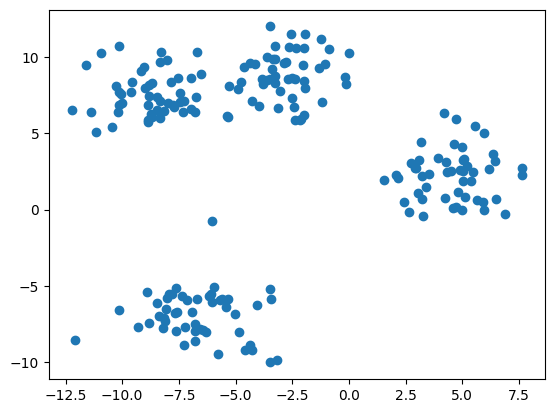

In [88]:
# récupération du tableau de tout les X / Y
plt.scatter(params[:,0], params[:,1])

## Création de l'objet qui va appliquer le partitionnement par agglomération
* n_clusters : Combien de partitions voulons-nous ?
* linkage : Quel mode de calcul des distances utiliser ?
* lancer l'entrainement de la prédiction sur les données

In [89]:
ac = AgglomerativeClustering(n_clusters=4, linkage='ward')
obj_pred = ac.fit_predict(params)
print(obj_pred, obj)

[2 3 3 3 0 0 2 3 2 0 0 2 2 0 0 0 1 3 0 0 0 0 3 1 3 1 1 0 1 2 0 0 3 3 1 2 3
 2 3 1 0 1 0 0 3 2 2 0 2 1 1 1 3 2 1 1 0 0 1 2 3 2 0 3 3 0 2 1 3 1 1 3 1 0
 2 0 2 1 0 1 1 2 0 3 3 3 3 1 2 3 0 1 2 2 2 3 1 2 0 1 3 3 1 0 1 2 3 0 0 3 2
 0 1 3 1 3 3 1 1 1 1 0 2 3 3 2 1 2 2 1 0 0 1 3 3 2 0 0 1 0 2 1 3 2 2 1 2 3
 0 0 1 3 2 3 0 3 3 2 2 2 1 2 2 3 1 0 2 2 0 2 3 1 0 0 2 0 2 1 1 0 1 0 3 3 3
 1 2 2 2 1 1 0 3 3 1 3 2 1 0 2] [1 0 3 3 2 2 1 3 1 2 2 1 1 2 2 2 0 3 2 2 2 2 3 0 3 0 0 2 0 1 2 2 3 3 0 1 3
 1 3 0 2 0 2 2 3 1 1 2 1 0 3 0 3 1 0 0 2 2 0 1 3 1 2 3 3 2 1 0 3 0 0 3 0 2
 1 2 1 0 2 0 0 1 2 3 3 3 3 0 1 3 2 0 1 1 1 3 0 1 2 0 3 3 0 2 0 1 3 2 2 3 1
 2 0 3 0 3 3 0 0 0 3 2 1 3 3 1 0 1 1 0 2 2 0 3 3 1 2 2 0 2 1 0 3 1 1 0 1 3
 2 2 0 3 1 3 2 3 3 1 1 1 0 1 1 3 0 2 1 1 2 1 3 0 2 2 1 2 1 0 0 2 0 2 3 3 3
 0 1 1 1 0 0 2 3 3 0 3 1 0 2 1]


## Représentation graphique de la prédiction
* La prédiction se décompose en 4 partitions
* Nous allons les représenter à l'aide de 4 couleurs différentes

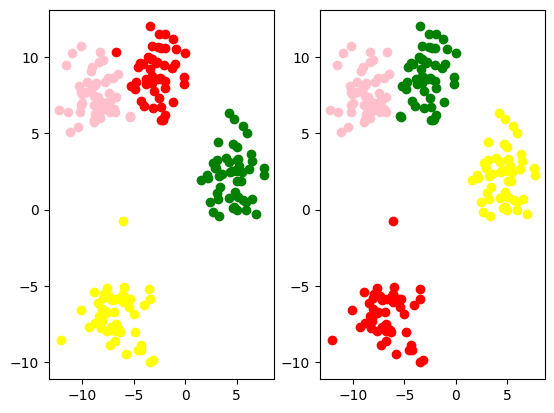

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(params[obj == 0, 0], params[obj == 0, 1], c='red')
ax[0].scatter(params[obj == 1, 0], params[obj == 1, 1], c='green')
ax[0].scatter(params[obj == 2, 0], params[obj == 2, 1], c='yellow')
ax[0].scatter(x=params[obj == 3, 0], y=params[obj == 3, 1], c='pink')

ax[1].scatter(params[obj_pred == 0, 0], params[obj_pred == 0, 1], c='red')
ax[1].scatter(params[obj_pred == 2, 0], params[obj_pred == 2, 1], c='yellow')
ax[1].scatter(params[obj_pred == 1, 0], params[obj_pred == 1, 1], c='green')
ax[1].scatter(params[obj_pred == 3, 0], params[obj_pred == 3, 1], c='pink')

<Axes: >

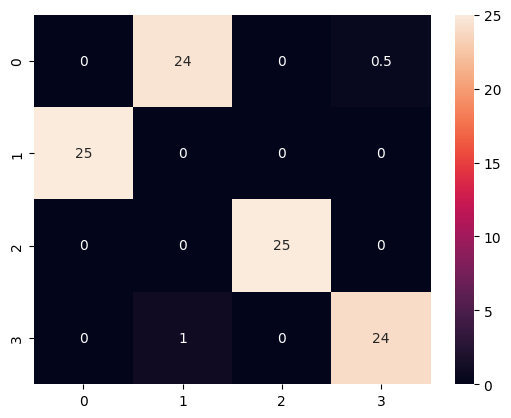

In [91]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

obj_pred = list(map(lambda x: 0 if x ==2 else (2 if x == 0 else x), obj_pred))
confusion = confusion_matrix(obj, obj_pred)

heatmap(confusion/len(obj_pred)*100, annot=True)

## Représentation graphique de la cible